# Lab 1: Linear regression and data fitting

## Solutions

In this assignment you will write your own functions to perform linear regression and analyze the results.


In [5]:
# Necessary imports
import numpy as np #package for work with arrays and matrices
import matplotlib.pyplot as plt #package with plotting capabilities
from scipy import stats
import pandas as pd

## Part 1: linear regression on 2-variable data sets

Linear regression is a supervised learning method for predicting the value of a response variable (Y) based on a linear model of the explanatory variable (X). The following scripts illustrate it using the function linregress() from the stats package.

First, let us generate a data set with y a linear function of x with known slope and intercept, plus added random noise:

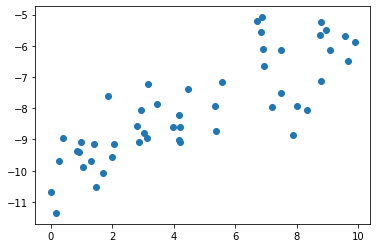

In [6]:
m = 0.4 # slope
b = -10 # intercept
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = m * x + b + rng.randn(50)
plt.scatter(x, y)
plt.show()

Ue the LinearRegression function to see whether it returns the correct slope and intercept and how well the line fits the data:

Model slope:     0.4272088103606956
Model intercept: -9.998577085553208
R^2:             0.6751620299329717


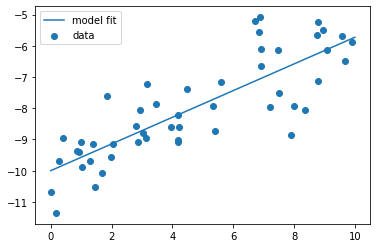

In [7]:
slope, intercept, r, p_value, std_err = stats.linregress(x,y)

print("Model slope:    ", slope)
print("Model intercept:", intercept)
print("R^2:            ", r**2)

xfit = np.linspace(0, 10, 1000)
yfit = xfit*slope + intercept

plt.scatter(x, y, label = 'data')
plt.plot(xfit, yfit, label = 'model fit')
plt.legend()
plt.show()

### Q1.1 Write your own linear regression function 

* Inputs: two vectors (X and Y) for the explanatory and response data. Don't forget to check that they are the same length!

* DO: calculate  the slope and intercept of the best-fit line, and the coefficient of determination $r^2$.

* Outputs: the best-fit slope, intercept, and the coefficient of determination $r^2$.

To calculate the slope and intercept, solve the normal equation below, where $\beta$ is the vector of parameters (slope and intercept), $A$ is the matrix containing a column of x values and a column of ones, $A^T$ is its transpose, and $y$ is the column vector of y values:

$$
(A^T A) \beta = A^T y
$$

To calculate the coefficient of determination, you can use either the definition:

$$ r^2 = \frac{Cov(X,Y)^2}{Var(X)Var(Y)}$$

or the fact that the coefficient of determination determines the fraction of variance explained by linear regression:

$$ r^2 = \frac{Var(\hat Y)}{Var(Y)} $$

where $\hat Y$ is the predicted response values: $\hat Y = mX + b$

You may find the following numpy functions useful for performing array calculations:

.T for array transpose

np.column_stack() https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html

np.linalg.solve() https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html

np.cov() https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.cov.html

np.var() https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.var.html (Please note you have to specify ddof=1 otherwise variance will be incorrect!)

Test your function on the simulated data and make sure it returns the same values as the LinearRegression() function.

In [8]:
def my_lin_reg(xdata, ydata):
    if (xdata.shape == ydata.shape):
        A = np.column_stack((xdata, np.ones(len(xdata))))
        params = np.linalg.solve(A.T@A, A.T@ydata.reshape((len(ydata),1)))
        r2 = (np.cov(xdata,ydata)[0,1])**2/(np.var(xdata, ddof=1)*np.var(ydata, ddof=1))
        return params, r2

params, r2 = my_lin_reg(x,y)
print("The slope and intercept are:", params)
print("The coefficient of determination is:", r2)

The slope and intercept are: [[ 0.42720881]
 [-9.99857709]]
The coefficient of determination is: 0.6751620299329718


The parameters and the coefficient of determination match those returned by linregress

### Q1.2 Calculate and plot the residuals

Calculate the residuals of the simulated data set and plot them over time. Report whether the plot of the residuals is consistent with the assumptions of linear regression. Calculate the fraction of the variance of the response variable that is in the residuals and relate it to the coefficient of determination $R^2$.


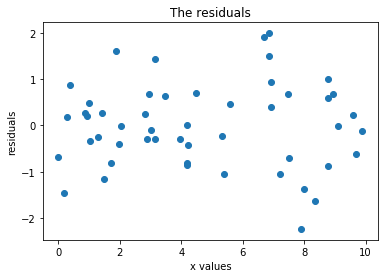

The residual fraction of variance is:0.32483797006702814


In [14]:
# Calculate the predicted values of y
y_pred = params[0]*x + params[1]
# Calculate the residuals
resid = y - y_pred
plt.scatter(x, resid, label = 'data')
plt.title('The residuals')
plt.xlabel('x values')
plt.ylabel('residuals')
plt.show()

frac = np.var(resid, ddof=1)/np.var(y, ddof=1)
print("The residual fraction of variance is:"+ str(frac))

The residual fraction of variance is exactly $1-R^2$, as expected. The plot of the residuals shows no trend, consistent with the assumptions of linear regression. 

## Part 2: Data analysis
You will analyze two time series here: one containing the total annual number of passengers flying on Australian air carriers, from 1970 to 2011:

In [3]:
aus = pd.read_csv("ausair.csv")
aus.head()

,aussies
0,7.3187
1,7.3266
2,7.7956
3,9.3846
4,10.6647


And we will compare it with total annual rice production (in millions metric tons) in Guinea, also from 1970 to 2011:

In [4]:
rice = pd.read_csv("guinearice.csv")
rice.head()

,guinearice
0,0.311405
1,0.325180
2,0.339565
3,0.354580
4,0.370265


**Q2.1** Plot these two variables on a scatterplot against each other. Use your linear regression function to calculate the best-fit line and plot it as well, and report the coefficient of determination. Does this seem like a significant relationship?

The slope and intercept are: [[0.02377417]
 [0.21265587]]
The coefficient of determination is: 0.9578108488326412


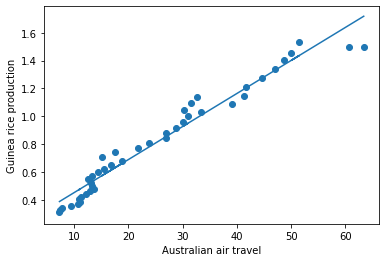

In [18]:
x = np.array(aus.aussies)
y = np.array(rice.guinearice)
plt.scatter(x, y, label = 'data')

params, r2 = my_lin_reg(x,y)
print("The slope and intercept are:", params)
print("The coefficient of determination is:", r2)

rice_fit = x*params[0] + params[1]
plt.plot(x, rice_fit, label = 'model fit')
plt.xlabel('Australian air travel')
plt.ylabel('Guinea rice production')
plt.show()

The coefficient of determination is almost 96%, indicating a very strong linear relationship between these variables.

**Q2.2** Calculate and plot the residuals of the linear regression and comment on their plot as well as histogram. How does this change your interpretation of the significance of the linear regression?

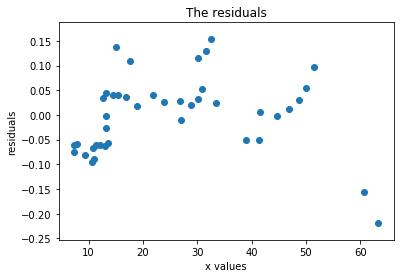

The residual fraction of variance is:0.04218915116735921


In [19]:
# Calculate the predicted values of y
y_pred = params[0]*x + params[1]
# Calculate the residuals
resid = y - y_pred
plt.scatter(x, resid, label = 'data')
plt.title('The residuals')
plt.xlabel('x values')
plt.ylabel('residuals')
plt.show()

frac = np.var(resid, ddof=1)/np.var(y, ddof=1)
print("The residual fraction of variance is:"+ str(frac))

These residuals look very different from the shapeless cloud observed in part 1. Essentially, the relationship that was modeled by the line was not based on the two variables, but on a third one (probably world economic growth) so all the interesting differences betwee the two variables are left in the residuals! This violates the main assumption of linear regression of independent, normally distributed residuals with a constant variance.

### Grading rubric:

Part 1: 10 pts for correctly working linear regression function, 5 pts for correct residual plot and analysis

Part 2: 5 pts for scatterplot and linear regression; 5 pts for residual plots and analysis

Total: 25 pts